In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## Loading Audio Files

In [ ]:
debussy_file = "debussy.wav"
redhot_file = "redhot.wav"
duke_file = "duke.wav"

In [ ]:
ipd.Audio(debussy_file)
ipd.Audio(redhot_file)
ipd.Audio(duke_file)

In [ ]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

## Root-mean-squared energy with Librosa

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [ ]:
rms_debussy = librosa.feature.rms(y=debussy,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(y=redhot,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(y=duke,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]

In [ ]:
rms_debussy.shape

## Visualise RMSE + waveform

In [ ]:
frames = range(len(rms_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

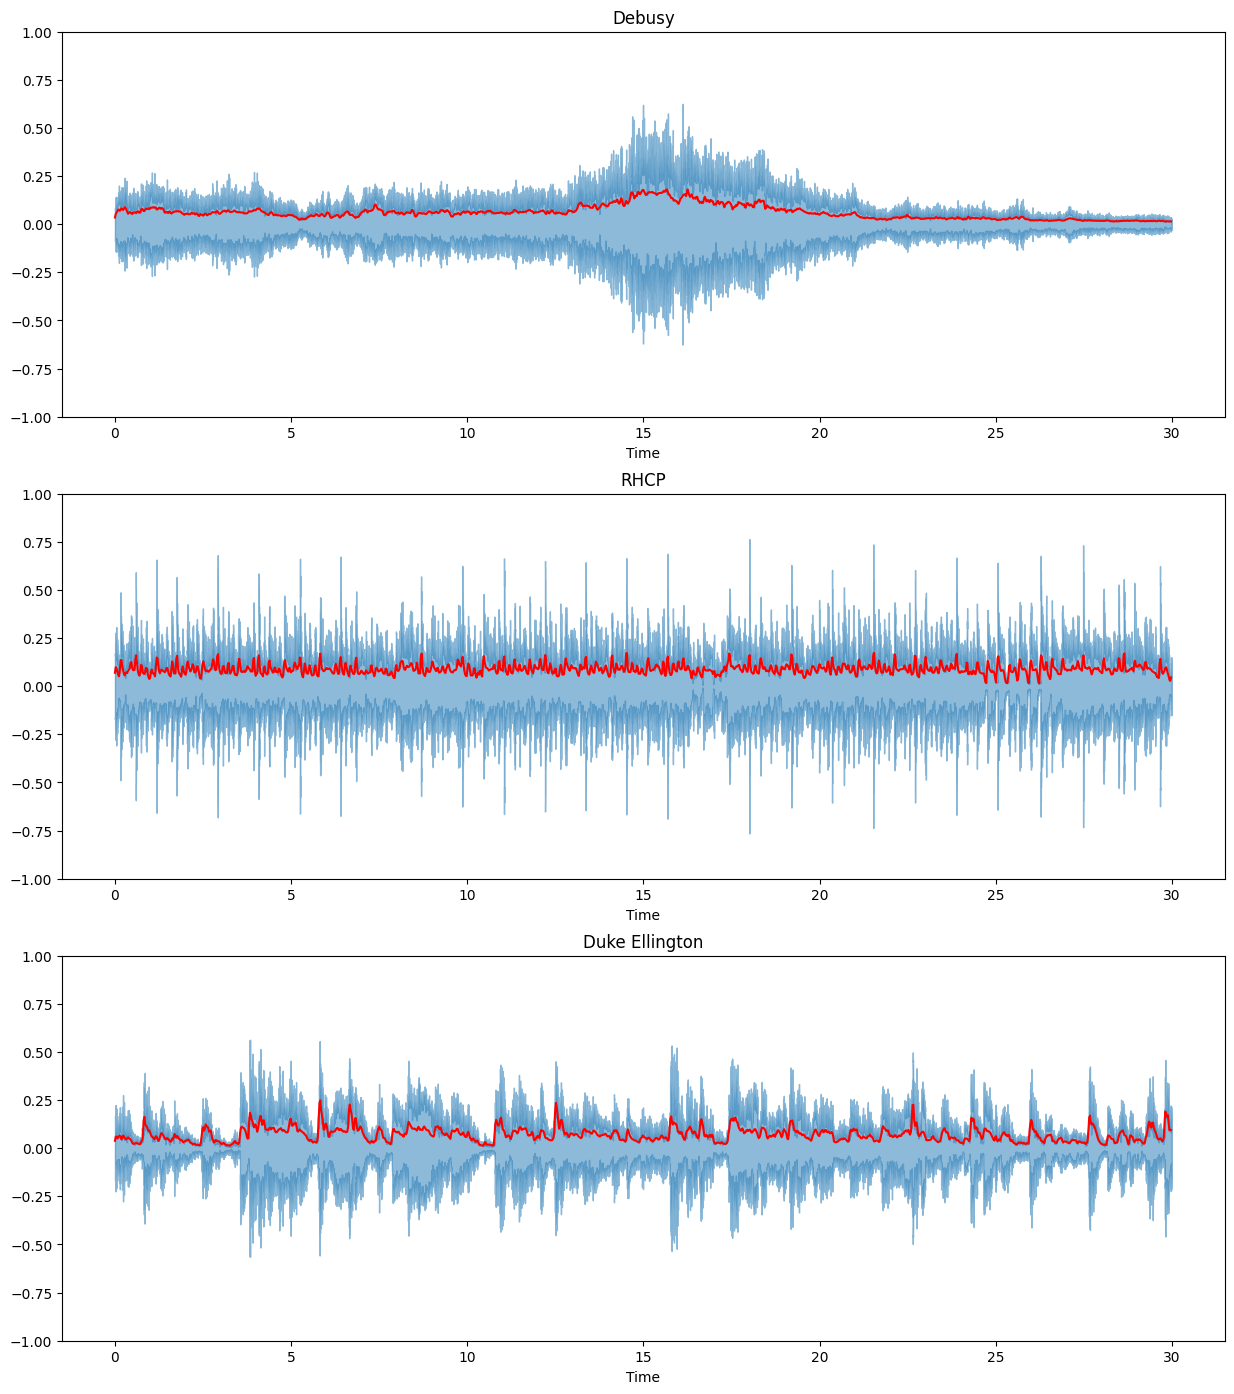

In [ ]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## RMSE from scratch

In [ ]:
def rmse(signal, frame_size, hop_length):
    rmse = []

    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length):
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [ ]:
rms_debussy1 = rmse(debussy, FRAME_SIZE, HOP_LENGTH)
rms_redhot1 = rmse(redhot, FRAME_SIZE, HOP_LENGTH)
rms_duke1 = rmse(duke, FRAME_SIZE, HOP_LENGTH)

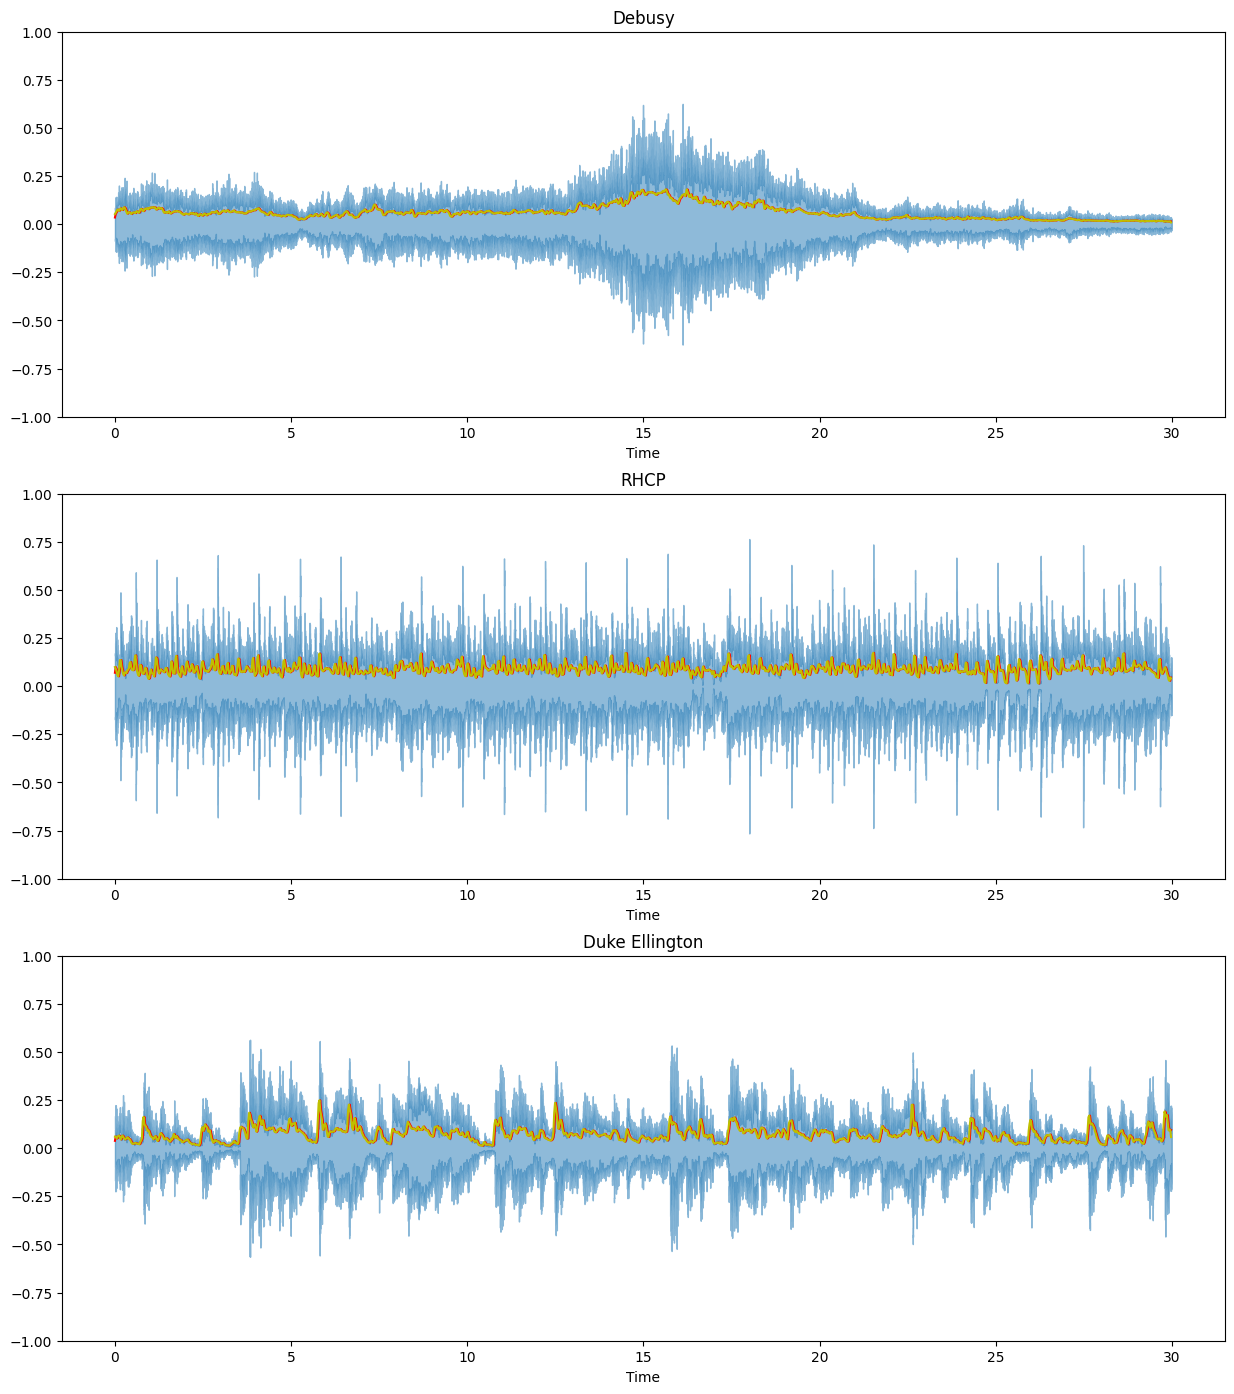

In [ ]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.plot(t, rms_debussy1, color="y")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.plot(t, rms_redhot1, color="y")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.plot(t, rms_duke1, color="y")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## Zero-crossing rate with Librosa

In [ ]:
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
zcr_debussy.size

1292

## Visualise zero-crossing rate with Librosa

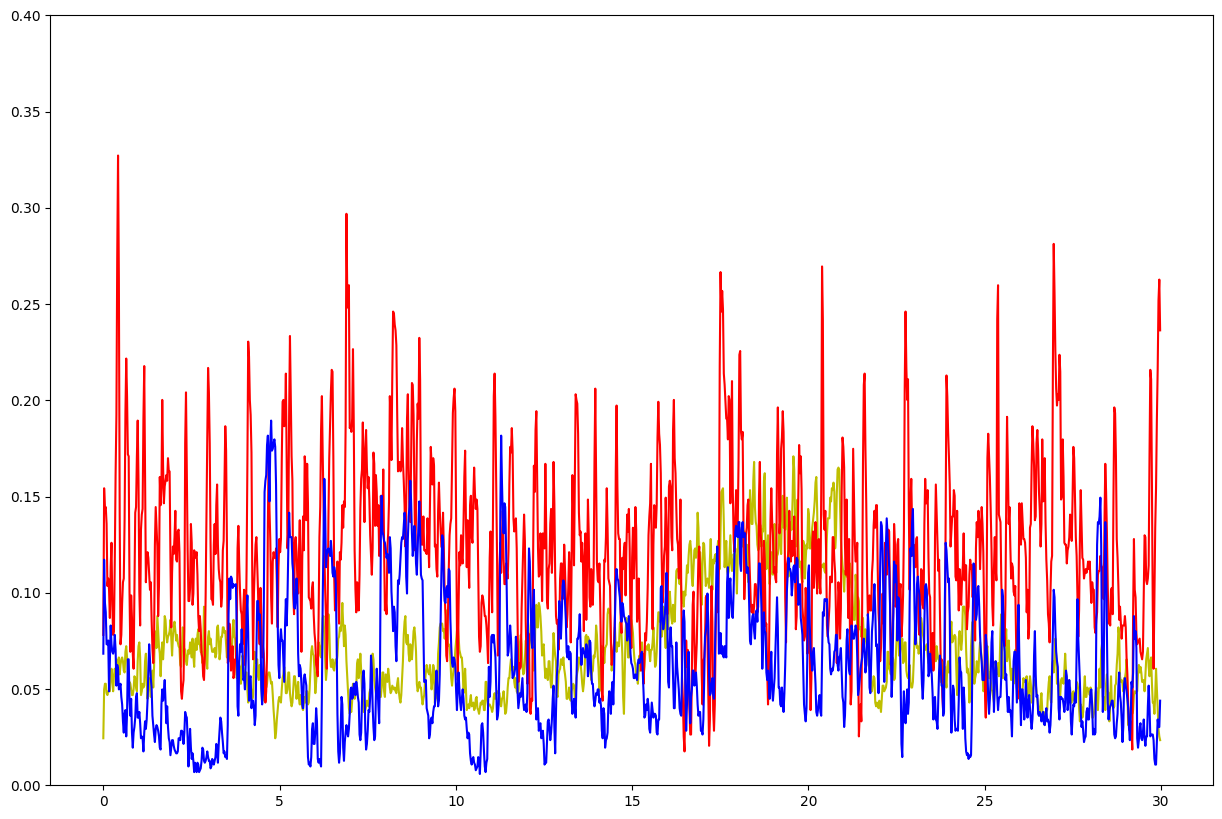

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_debussy, color="y")
plt.plot(t, zcr_redhot, color="r")
plt.plot(t, zcr_duke, color="b")
plt.ylim(0, 0.4)
plt.show()

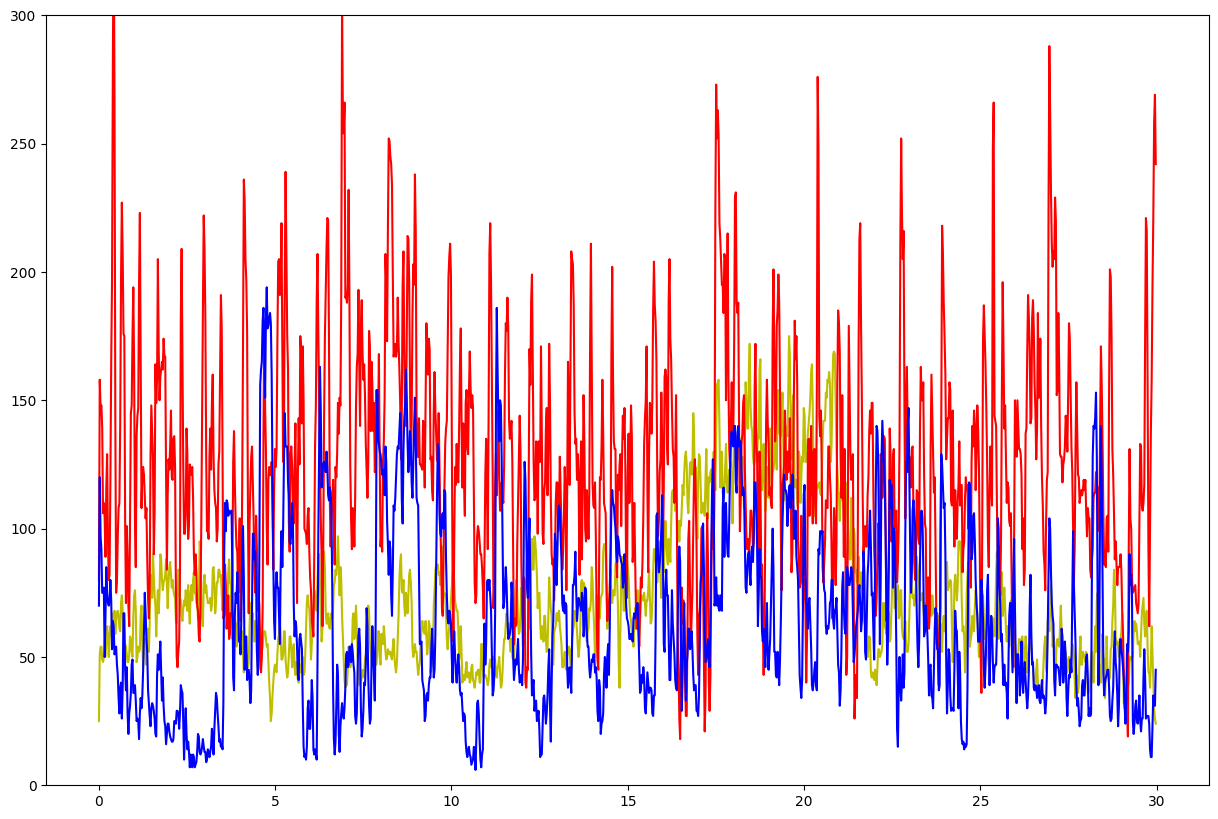

In [ ]:
plt.figure(figsize=(15, 10))

# FRAME_SIZE를 곱한게 실제
plt.plot(t, zcr_debussy*FRAME_SIZE, color="y")
plt.plot(t, zcr_redhot*FRAME_SIZE, color="r")
plt.plot(t, zcr_duke*FRAME_SIZE, color="b")
plt.ylim(0, 300)
plt.show()

## ZCR: Voice vs Noise

In [ ]:
voice_file = "voice.wav"
noise_file = "noise.wav"

In [ ]:
ipd.Audio(voice_file)

In [ ]:
ipd.Audio(noise_file)

In [ ]:
# load audio files
voice, _ = librosa.load(voice_file, duration=15)
noise, _ = librosa.load(noise_file, duration=15)

In [ ]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(voice, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(noise, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames = range(len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

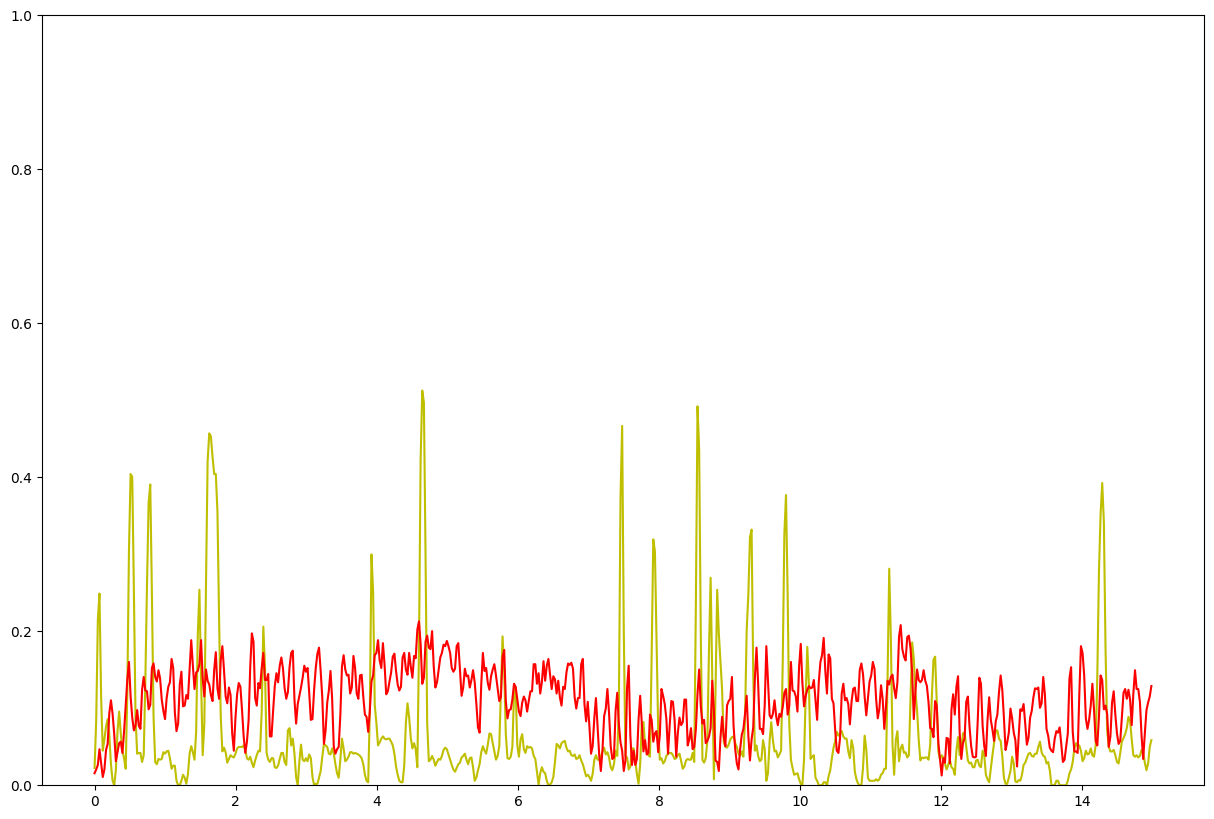

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_voice, color="y")
plt.plot(t, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()